## Programming for Data Analysis - Project 2
***

#### Martin Cusack        

#### G00239124
***


### Introduction
***

In this notebook, I will conduct analysis and investigation of a data set sourced from the UC Irvine Machine Learning Repository, containing data on breast cancer samples gathered by a team at the University of Wisconsin Hospitals and Clinics. The features of the data set are calculated from a fine needle aspirate (FNA) of a breast mass and describe characteristics of the relevant cell nuclei. Using this data set, I will train a number of machine learning algorithms to assess their accuracy in determining the class of each sample.  I will also carry out a literature review focusing on some of the machine learning research around this particlar data set and comparing the results documented in various academic papers to my own findings.

In [1]:
# import Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from sklearn.model_selection import train_test_split

### Summary Statistics
***

In the following cells, I will summarise the Breast Cancer Wisconsin (Original) Data Set using some basic Pandas functions to gain a keener insight into the shape and size of the data. It will also be useful to determine whether there are any anomalous features in the data, such as null values, which may affect any calculations later in the project.

I sourced the Wisconsin Original data set from [Kaggle](https://www.kaggle.com/datasets/mariolisboa/breast-cancer-wisconsin-original-data-set)

In [20]:
# import Breast Cancer Wisconsin (Original) Data Set into a pandas data frame

df=pd.read_csv('https://raw.githubusercontent.com/martincusack979/PFDA_Project_2/main/PFDA%20-%20Project%202/Data/breast_cancer_bd.csv')
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [21]:
# summary statistics - display number of rows and columns
df.shape

(699, 11)

In [22]:
# summary statistics - show first 5 rows
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [23]:
## summary statistics - describe
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [24]:
# show count of attributes in column "Class"
print(df['Class'].value_counts())

2    458
4    241
Name: Class, dtype: int64


In [25]:
# show number of null values
df.isna().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

As shown above, there are 16 null values in this data set; all 16 are found in the "Bare Nuclei" column.  It may be necessary to remove these later in my investigation, as they could affect the classification process when deploying a machine learning algorithm.

### Breast Cancer Wisconsin (Original) Data Set
***

The Breast Cancer (Original) Data Set was created at the University of Wisconsin Hospitals in Madison, Wisconsin, USA, by a team led by Dr. William Wolberg.  It is a multi-variate data set which is available in two different forms, **Original** and **Diagnostic**.  For the purposes of this project I chose to investigate the Original version.

As shown above, the Original Data Set has 699 rows and 11 columns, with 16 missing values.  The first column, **"Sample code number"**, is used solely for identification purposes and contains a 6 or 7 digit sample number.  The next 9 columns ("**Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses")** all refer to different measurements of breast cancer tissue samples and contain integer values ranging from 1 to 10. The final column ("Class") separates the samples into either Class 2 (benign) or Class 4 (malignant).  As shown above using the .value_counts() function, the data set includes 458 instances of class 2 and 241 instances of class 4.

### Visualising the data

In [26]:
# remove first column as it does not contain any relevant info
df1 = df.drop(columns=['Sample code number'])

In [ ]:
df1.head()

#### Count plot

C:\Users\cusac\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

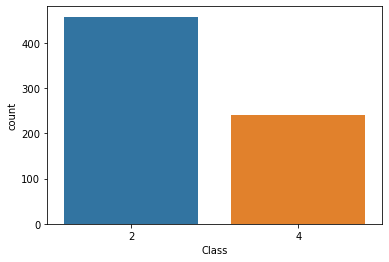

In [27]:
# visualise count of benign (2) and malignant (4) samples from column "Class"
sns.countplot(df1['Class'], label = "Count")

From the above count plot, we can see that the malignant samples in the data set are outnumbered by the benign samples by a factor of almost 2:1.

#### Histograms

<AxesSubplot:xlabel='Clump Thickness', ylabel='Count'>

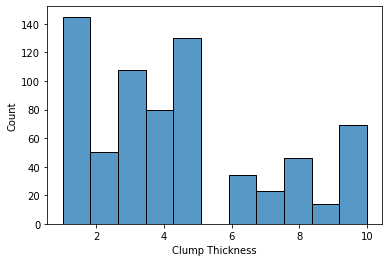

In [28]:
# create seaborn histogram of Clump Thickness column
sns.histplot(data=df1, x="Clump Thickness")

<AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Count'>

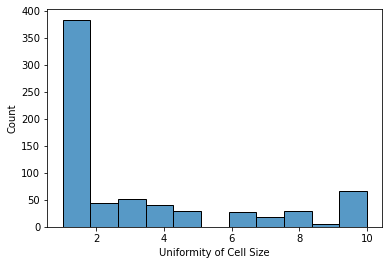

In [29]:
# create seaborn histogram of Uniformity of Cell Size column
sns.histplot(data=df1, x="Uniformity of Cell Size")

<AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Count'>

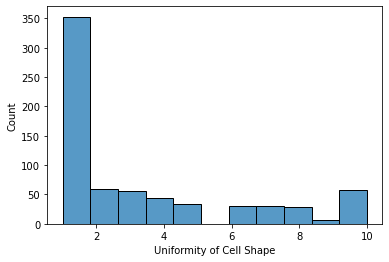

In [30]:
# create seaborn histogram of Uniformity of Cell Shape column
sns.histplot(data=df1, x="Uniformity of Cell Shape")

<AxesSubplot:xlabel='Marginal Adhesion', ylabel='Count'>

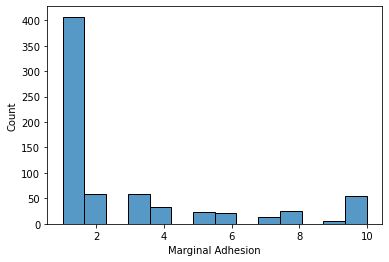

In [31]:
# create seaborn histogram of Marginal Adhesion column
sns.histplot(data=df1, x="Marginal Adhesion")

<AxesSubplot:xlabel='Single Epithelial Cell Size', ylabel='Count'>

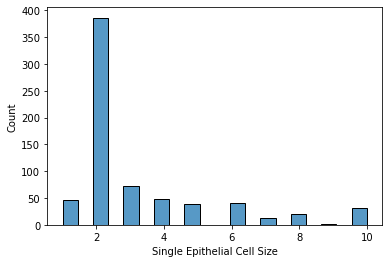

In [32]:
# create seaborn histogram of Single Epithelial Cell Size column
sns.histplot(data = df1, x = "Single Epithelial Cell Size")

<AxesSubplot:xlabel='Bare Nuclei', ylabel='Count'>

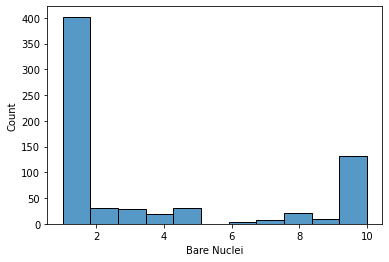

In [33]:
# create seaborn histogram of Bare Nuclei column
sns.histplot(data = df1, x = "Bare Nuclei")

<AxesSubplot:xlabel='Bland Chromatin', ylabel='Count'>

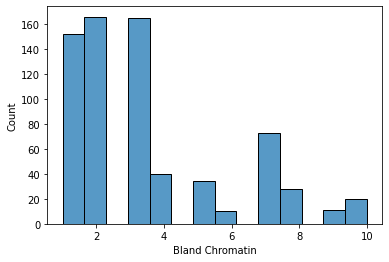

In [34]:
# create seaborn histogram of Bland Chromatin column
sns.histplot(data = df1, x = "Bland Chromatin")

<AxesSubplot:xlabel='Normal Nucleoli', ylabel='Count'>

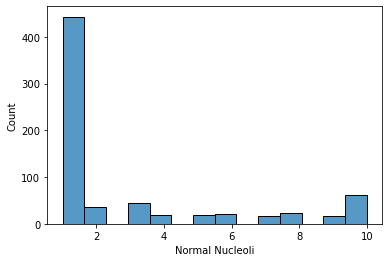

In [35]:
# create seaborn histogram of Normal Nucleoli column
sns.histplot(data = df1, x = "Normal Nucleoli")

#### Scatterplot

<AxesSubplot:xlabel='Clump Thickness', ylabel='Single Epithelial Cell Size'>

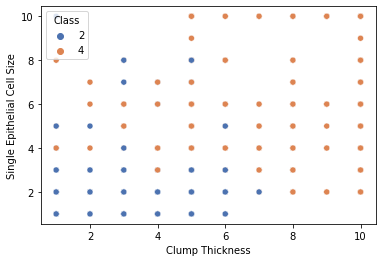

In [36]:
# investigate relationship between Clump Thickness and Single Epithelial Cell size with scatterplot
sns.scatterplot(x='Clump Thickness',y='Single Epithelial Cell Size', hue='Class', palette= "deep", data=df1)

As we can see there is a clear relationship between these two columns.  Since malignant tissue samples are larger due to their more aggressize growth rate, we see that the larger data points on the upper right of the plot are all of Class 4 (malignant), with greater clump thickness and cell size.

#### Pairplot

Pairplot : I used seaborn's pairplot function to create a grid displaying relationships between the columns **"Marginal Adhesion"**, **"Bland Chromatin"**, **Bare Nuclei"** and **"Normal Nucleoli"**.

In [37]:
df2 = df1.drop(columns=['Clump Thickness', 'Mitoses', 'Single Epithelial Cell Size', 'Uniformity of Cell Size', 'Uniformity of Cell Shape'])

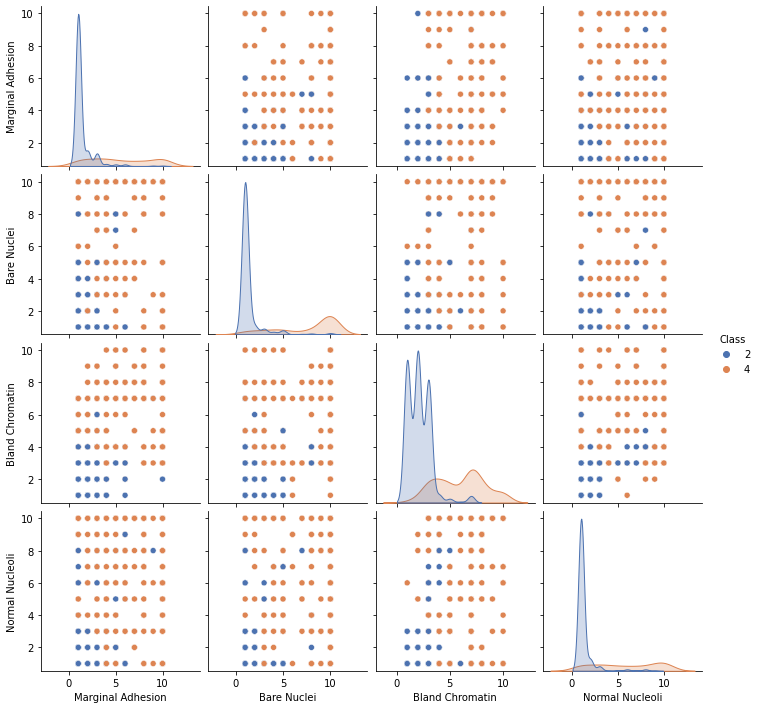

In [38]:
sns.pairplot(df2, hue = 'Class', palette= "deep")

As we can see again, the Class 4 malignant cells dominate the upper right space of each of the separate scatterplots in the grid, with demonstrably higher measurements for Bland Chromatin, Normal Nucleoli, Bare Nuclei and Marginal Adhesion than the samples which fall into the Class 2 benign cells.

### Machine Learning Algorithms - Nearest Neighbours
***

Nearest Neighbours is one of the most popular machine learning algorithms in data science, in part due to its relative simplicity.  Nearest Neighbours is a supervised learning model and, as its name implies, it works by identifying a specified number of proximate data points (this number is defaulted at 5) and then estimating the label based on this data.  

In the below cells, I set up and train an instance of Nearest Neighbours to make predictions based on the Breast Cancer (original) Data Set.  This will be an example of binary classification, where "Class" is the target variable.

In [39]:
# drop bare nuclei column as the null values within this column create errors when fitting to classifier
df3 = df1.drop(columns=['Bare Nuclei'])

In [40]:
df3.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2


In [ ]:
# inputs and outputs
inputs = df3[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
outputs = df3 ['Class']

In [ ]:
# instantiate classifier
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [ ]:
# training classifier
knn.fit(inputs, outputs)

In [ ]:
# display row 1
df3.loc[0]

In [ ]:
# verify if classifier works by entering data for row 1
knn.predict([[5, 1, 1, 1, 2, 3, 1, 1]])

In [ ]:
# check accuracy
(knn.predict(inputs)==outputs).sum()

As we can see from the above, 675 out of 699 predictions were accurate, a success rate of 96.5%.

In [ ]:
# import train_test_split function and split dataset into training set and test set
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [ ]:
# check if length is one-third of data set rows(i.e 231) as specified above 
outputs_test

In [ ]:
# re-initialise classifier
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [ ]:
# retraining classifier, this time with inputs_train and outputs_train instead of full data set
knn.fit(inputs_train, outputs_train)

In [ ]:
# execute predict
(knn.predict(inputs_test) == outputs_test).sum()

As we can see, 223 out of 231 predictions using the Nearest Neighbours classifier were accurate, a percentage of 96.5%. This high percentage illustrates the effectiveness of Nearest Neighbours as a binary classifier, particularly when dealing with relatively small data sets.

### Machine Learning Algorithms - Support Vector Machines
***

Support vector machines (SVM) are a popular and effective set of machine learning algorithms, offering a high degree of accuracy and fast predictions. SVM is highly verstaile and can be used for classification, regression and outliers detection. It's various applications include face detection, intrusion detection and classification of emails. The idea behind SVM is based on the concept of "decision planes", which define decision boundaries. 

In the below cells, I set up and train an instance of SVM to make predictions based on the Breast Cancer (original) Data Set. Again, this will be an example of binary classification where "Class" is the target variable.

In [ ]:
from sklearn import svm

In [ ]:
# inputs and outputs
inputs = df3[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
outputs = df3 ['Class']

In [ ]:
# create SVM Classifier (clf = classifier)
clf = svm.SVC(kernel='linear')

In [ ]:
#Train classifier using training stes
clf.fit(inputs, outputs)

In [ ]:
# verify if classifier works by entering data for row 1
clf.predict([[5, 1, 1, 1, 2, 3, 1, 1]])

In [ ]:
# check accuracy
(clf.predict(inputs)==outputs).sum()

As we can see from the above, 673 out of 699 predictions were accurate, a success rate of 96.2%.

In [ ]:
# import train_test_split function and split dataset into training set and test set
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.33) 

In [ ]:
# check if length is one-third of data set rows(i.e 231) as specified above 
outputs_test

In [ ]:
# re-initialise classifier
clf = svm.SVC(kernel='linear')

In [ ]:
# retraining classifier, this time with inputs_train and outputs_train instead of full data set
clf.fit(inputs_train, outputs_train)

In [ ]:
# execute predict
(clf.predict(inputs_test) == outputs_test).sum()

As shown above, 221 out of 231 predicts using Support Vector Machines were accurate, a percentage of 95.6%.  This is a slightly lower rate of success than calculated by the Nearest Neighbours algorithm.

### Machine Learning Algorithms - Naive Bayes
***

Naive Bayes is a classification algorithm based on Bayes Theorem. It is one of the simplest supervised learning techniques, often used in spam filtering and text classification, and is notable for its speed and accuracy. 

In the below cells, I set up and train an instance of Naive Bayes to make predictions based on the Breast Cancer (original) Data Set. Again, this will be an example of binary classification where "Class" is the target variable.

In [ ]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [ ]:
# inputs and outputs
inputs = df3[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
outputs = df3 ['Class']

In [ ]:
# Initialise Gaussian Classifier
nb = GaussianNB()

In [ ]:
# Train the model using the training sets
nb.fit(inputs, outputs)

In [ ]:
# verify if classifier works by entering data for row 1
nb.predict([[5, 1, 1, 1, 2, 3, 1, 1]])

In [ ]:
# check accuracy
(nb.predict(inputs)==outputs).sum()

As we can from the above test, 668 out of 699 predictions were accurate, a success rate of 95.5%.

In [ ]:
# import train_test_split function and split dataset into training set and test set
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.33)

In [ ]:
# check if length is one-third of data set rows(i.e 231) as specified above 
outputs_test

In [ ]:
# re-initialise Gaussian Classifier
nb = GaussianNB()

In [ ]:
# retraining classifier, this time with inputs_train and outputs_train instead of full data set
nb.fit(inputs_train, outputs_train)

In [ ]:
# execute predict
(nb.predict(inputs_test) == outputs_test).sum()

As shown above, 222 out of 231 predicts using Naive Bayes were accurate, a percentage of 96.1%.  This is a slightly lower rate of success than calculated by the Nearest Neighbours algorithm, but a slightly higher success rate than that of Support Vector Machines.  The differences between the results of the three classifiers were very marginal, however; only 1% separates the accuracy of Nearest Neighbours (most accurate) and Support Vector Machines (least accurate).

#### Visualising accuracy rate of classifiers

A bar chart can display the relative accuracy achieved by each of the classifiers (see below).  As we can see, KNN Nearest Neighbours proved to be the most effective classifier in predicting the class of each sample.

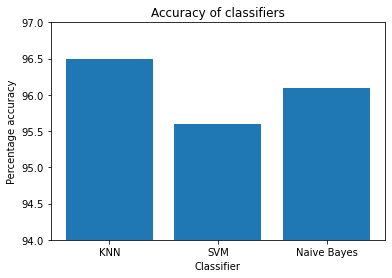

In [9]:
# Create bar chart comparing rate of accuracy of each of the classifiers: KNN, SVM and Naive Bayes.
classifier = ['KNN', 'SVM', 'Naive Bayes']
accuracy = [96.5, 95.6, 96.1]
plt.bar(classifier, accuracy)
plt.title('Accuracy of classifiers')
plt.xlabel('Classifier')
plt.ylabel('Percentage accuracy')
plt.ylim(94, 97) # define limits of y axis
plt.show()

### Literature Review

#### 1.

In this [paper](https://www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf) by a team at Pabna University of Science and Technology in Bangladesh, a range of algorithms (Naïve Bayes, Support Vector Machines, Multilayer Perceptron, J48 and Random Forest) are used to classify data extracted from the Breast Cancer (original) Wisconsin Data Set.  Since I have used Naive Bayes and SVM in my investigation, it will be useful to compare my results with those of the team from Pabna University.

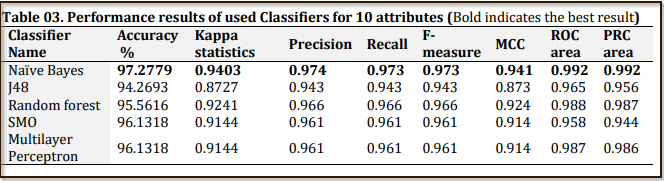

My deployment of Naive Bayes resulted in a rate of accuracy of 96.1%.  In the Pabna University paper, we see from their results above that their results were marginally better, with a 97.2% rate of accuracy. Indeed, Naive Bayes outperformed all of the other algorithms used by the Pabna University team.

Another algorithm used by the team at Pabna was Sequential minimal optimization (SMO), an instance of Support Vector Machines. In the above table, we see that SMO scored an accuracy rating of 96.1%.  This is very close to the score of 95.6% from my own usage of SVM.

#### *Conclusion:*  

Looking at the methodology used by the Pabna team helps to explain why their results vary from my own. As shown above, I dropped the **"Bare nuclei"** column from my data set, as the null values within this column created errors when I attempted to fit a classifier.  However, the Pabna team included this column, and also dropped the **"Single Epithelial Cell Size"** column; "we removed attribute named as ‘Single Epithelial Cell Size’ and came to better accuracy and overall performance."

As a result, the data sets investigated differed slightly before any classification took place.  

#### 2.

In this [study](https://www.researchgate.net/publication/336727928_Effective_K-nearest_neighbor_classifications_for_Wisconsin_breast_cancer_data_sets) by a team at National Taiwan University of Science and Technology, the KNN Nearest Neighbours algorithm was used to make predictions based on the data in the Wisconsin (Original) data set. 

The team focused entirely on applying the KNN algorithm in this study and so there is a great degree of insight to be gleaned on the effectiveness of the Nearest Neighbours classifier.  The below table clearly illustrates the depth of mathematical complexity in the team's calculations. Since KNN runs on the concept of distance between data points, or "neighbours", the team uses a variety of distance functions (Minkowski, Euclidean, Manhattan et cetera) to give a more complete picture of the data.  

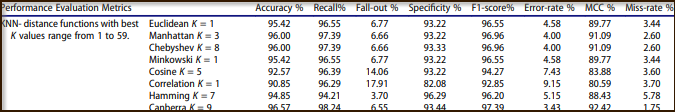

Each of the various distance functions have different trainning and predicting times and, as can be seen in the above table, vary widely in terms of their classification accuracy rates.  The Correlation function scored only 90.85%, while the Canberra fucntion scored highest with 96.57%.

#### *Conclusion:*

The study by the Taiwan University team illustrates the complexity of the mathematics behind even this simplest of machine learning algorithms, KNN Nearest Neighbours.  The table above clearly shows the variety of success rates when deploying a range of different distance functions, but it's interesting that the Euclidean function scored an accuracy rate of 95.42%. The Euclidean function is the default KNN distance function, and hence is the one used in my investigation of the same data set detailed earlier. When I ran the KNN algorithm, it scored a success rate of 96.5%, quite close to the score measured by the team at National Taiwan University.


#### 3.

In this [academic study](https://gssrr.org/index.php/JournalOfBasicAndApplied/article/view/12300) by Sulyman Age Abdulkareema
and Zainab Olorunbukademi Abdulkareem, impressive results were yielded by using an alternative set of classifiers on the data in the Wisconsin (Original) set. As we can see from the illustration below, the Random Forest (RF) and eXtreme Gradient Boosting (XGBoost) classifiers were deployed in this study. Random Forest is a supervised learning algorithm which can be used both for classification and regression, is based on the idea of decision trees which form a "forest".   eXtreme Gradient Boosting (XGBoost) is renowned for its speed as well as being a particularly effective classifier when working with structured data.

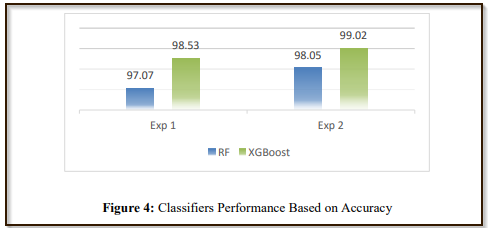

#### *Conclusion:* 
Both the Random Forest (RF) and eXtreme Gradient Boosting (XGBoost) classifiers scored notably higher success rates than any of the algorithms used in the studies discussed above.  This demonstrates that some machine learning techniques are more suited to fit particular data sets than others.

### Literature Review - Credits

1. www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf

2. 
https://www.researchgate.net/publication/336727928_Effective_K-nearest_neighbor_classifications_for_Wisconsin_breast_cancer_data_sets


3.  https://gssrr.org/index.php/JournalOfBasicAndApplied/article/view/12300

### References
***

Wolberg, William H. and Mangasarian O.L: "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, December 1990, pp 9193-9196 Available at https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original) (Accessed: January 8, 2023).

Unknown Author (no date). "Machine Learning". Available at: https://www.w3schools.com/python/python_ml_getting_started.asp (Accessed: January 4, 2023).

Lisboa, Mario.  "Breast Cancer Wisconsin (Original) Data Set" (2022)." Available at: https://www.kaggle.com/datasets/mariolisboa/breast-cancer-wisconsin-original-data-set (Accessed: January 5, 2023).

Naviani, Avinash. "KNN Classification Tutorial using Scikit-learn" (2018) Available at: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn (Accessed: January 8, 2023). 

Naviani, Avinash.  "Support Vector Machines with Scikit-learn Tutorial" (2019) Available at: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python (Accessed: January 8, 2023).

Naviani, Avinash."Naive Bayes Classification Tutorial using Scikit-learn".  (2018)  Available at: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn  (Accessed: January 6, 2023)

Naviani, Avinash "Understanding Random Forests Classifiers in Python Tutorial" (2018) Available at: https://www.datacamp.com/tutorial/random-forests-classifier-python (Accessed: January 8, 2023)

Sharma, Mohit.  "Data Visualization using Seaborn" 2018. Available at: https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850  (Accessed: January 5, 2023)

Pathak, Manish.  "Using XGBoost in Python Tutorial"  2019.  Available at:  https://www.datacamp.com/tutorial/xgboost-in-python (Accessed: January 6, 2023)

### End
***